In [1]:
#Copy Everything one cell
#Import libraries

import pandas as pd #Pandas for data loading
import numpy as np #Numpy for easy matrix multiplication
import matplotlib.pyplot as plt # Matplotlib for visualiziation
from sklearn.datasets import load_breast_cancer, make_moons #Loading breast_cancer dataset, classificaiton model
from sklearn.model_selection import train_test_split, GridSearchCV #test train_split + grid search
from sklearn.preprocessing import StandardScaler #Scaler
from sklearn.svm import SVC #
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc #Evaluation metrics
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

In [3]:
# Task 1: Basic SVM Implementation
def task1():
   # Load the breast cancer dataset
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target
    feature_names = cancer.feature_names
    target_names = cancer.target_names

# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# TODO: Create a pipeline with StandardScaler and SVC
# Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('svm', SVC(kernel = "linear"))  # Support Vector Classifier, specify kernel
    ])

# TODO: Train the model
    pipeline.fit(X_train, y_train)

# TODO: Make predictions
    y_pred = pipeline.predict(X_test)

# TODO: Evaluate the model (accuracy, confusion matrix, classification report)
    print(classification_report(y_test, y_pred))
    print("\n\n\n")


    # TODO: Plot two features and the decision boundary
    #plt.plot()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
#Create new model only using two features
    Xplt = X[:,:2] #X using two features
    X_train_plt, X_test_plt, y_train_plt, y_test_plt = train_test_split(Xplt, y, test_size=0.3, random_state=42)
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train_plt, y_train_plt)

    fig, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        Xplt,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Decision Boundary')
    plt.show()
    return

In [14]:
# Task 2: Kernel Exploration
def task2():
    """
    Explore different kernels on a non-linearly separable dataset.
    """
    # Create a non-linearly separable dataset
    X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # TODO: Implement SVM with different kernels (linear, polynomial, rbf)
    # and visualize decision boundaries for each
    # YOUR CODE HERE
    
    #Initialize linear, polynomial and rbf
    svm_linear = SVC(kernel='linear', C=1)
    svm_poly = SVC(kernel='poly', degree=3, C=1)
    svm_rbf = SVC(kernel='rbf', gamma='scale', C=1) # gamma='scale' is a good default

    #Train all three models
    svm_linear.fit(X_train, y_train)
    svm_poly.fit(X_train, y_train)
    svm_rbf.fit(X_train, y_train)

    #Make predictions using all three models
    
    y_pred_linear = svm_linear.predict(X_test)
    y_pred_poly = svm_poly.predict(X_test)
    y_pred_rbf = svm_rbf.predict(X_test)

    #Evaluate all three models
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

    print(f"Linear Kernel Accuracy: {accuracy_linear:.4f}")
    print(f"Polynomial Kernel Accuracy: {accuracy_poly:.4f}")
    print(f"RBF Kernel Accuracy: {accuracy_rbf:.4f}")
    
    
    # Example visualization code:
    def plot_decision_boundary(model, X, y, title):
        h = 0.02  # Step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
    print("\n\n\n\n")
    print("VISUALIZATIONS\n\n")
    print("The Linear Kernel Decision Boundary:")
    plot_decision_boundary(svm_linear, X, y, "Linear Kernel")
    print("\n\nThe Polynomial Kernel Decision Boundary\n\n")
    plot_decision_boundary(svm_poly, X, y, "Polynomial Kernel")
    print("\n\nThe Radial Basis Function Kernel Decision Boundary\n\n")
    plot_decision_boundary(svm_rbf, X, y, "Radial Basis Function")
    return

Linear Kernel Accuracy: 0.8667
Polynomial Kernel Accuracy: 0.8333
RBF Kernel Accuracy: 0.9667





VISUALIZATIONS


The Linear Kernel Decision Boundary:


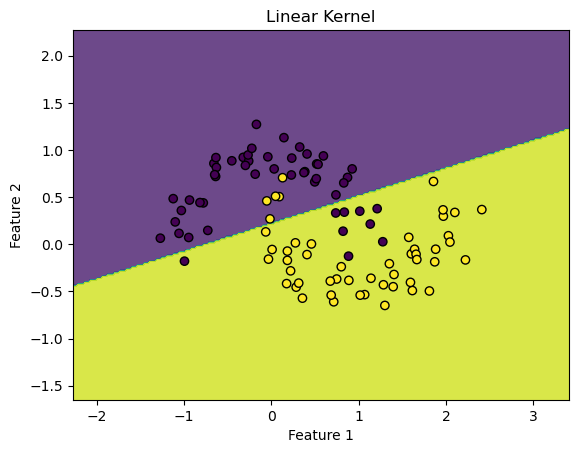



The Polynomial Kernel Decision Boundary




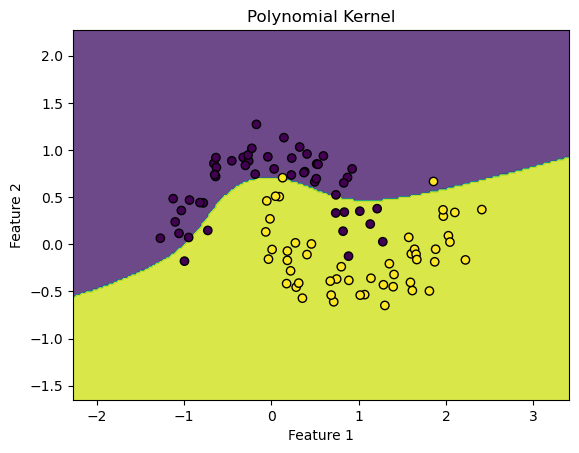



The Radial Basis Function Kernel Decision Boundary




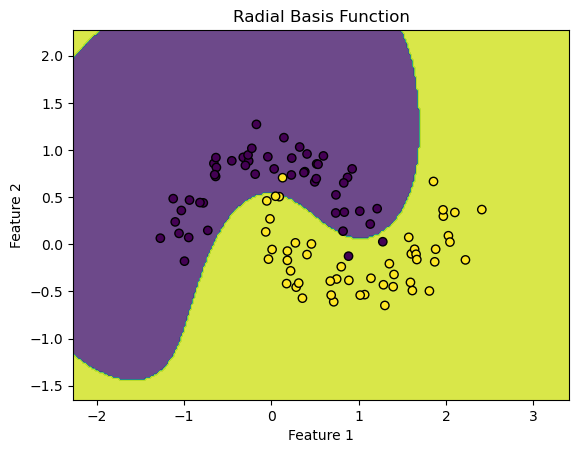

In [15]:
task2()

Amazing
The kernel transforms the data, projecting it into higher-dimensional space allowing for linear boundaries to potentially manifest
this is almost the opposite of dimensionality reduction that projects data into LOWER dimensional space

In [47]:
# Task 3: Hyperparameter Tuning
def task3():
    """
    Tune the hyperparameters of SVM using GridSearchCV.
    """
    # Load the breast cancer dataset
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True))
    ])

    svm = SVC(probability = True)
    # TODO: Define the parameter grid
    # YOUR CODE HERE
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 0.1, 1]}
   
    # TODO: Implement GridSearchCV
    # YOUR CODE HERE
    #grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring = 'accuracy', verbose = 1)
    grid_search = GridSearchCV(svm, param_grid, cv=3)
    grid_search.fit(X_train, y_train)

    # Access the best parameters
    best_parameters = grid_search.best_params_
    print(f"Best parameters: {best_parameters}")
    # TODO: Report the best parameters and performance
    # YOUR CODE HERE
    #print("Best parameters:", grid_search.best_params_)
    # TODO: Evaluate the best model on the test set
    # YOUR CODE HERE
    best_model = grid_search.best_estimator_
    #y_prob = grid_search.best_estimator_.predict_proba(X)
    y_prob = grid_search.best_estimator_.predict_proba(X)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", accuracy)
    # TODO: Plot ROC curve
    # YOUR CODE HERE
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:171, 0])

    plt.figure()
    plt.plot(fpr, tpr, color = 'darkorange', lw=2, label = "ROC Curve")
    plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc = "lower right")
    plt.show()
    return

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.9707602339181286


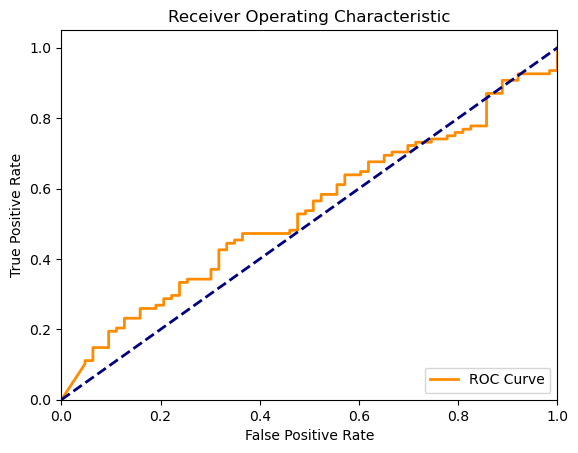

In [48]:
task3()

In [154]:
# Task 4: Feature Importance Analysis
def task4():
    """
    Analyze feature importance for SVM models.
    """
    # Load the breast cancer dataset
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target
    feature_names = cancer.feature_names
    
    # TODO: Implement a linear SVM and extract the coefficients
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    svm = LinearSVC()
    svm.fit(X_train, y_train)
    coefficients = svm.coef_[0]
    
    # TODO: Visualize feature importance
    # YOUR CODE
    plt.bar(feature_names, abs(coefficients))
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Feature Importance')
    plt.show()
    #feature_names = 
    # TODO: Perform feature selection and compare model performance
    # YOUR CODE HERE
    # Feature selection using L1 regularization (built into LinearSVC)
    sfm = SelectFromModel(svm, prefit=True)
    X_train_selected = sfm.transform(X_train)
    X_test_selected = sfm.transform(X_test)

# Train a new SVM model with selected features
    svm_selected = LinearSVC()
    svm_selected.fit(X_train_selected, y_train)

# Evaluate model performance before feature selection
    y_pred = svm.predict(X_test)
    accuracy_before = accuracy_score(y_test, y_pred)
    print("First Comparison")
    print(f"\n\nAccuracy before feature selection: {accuracy_before}")

# Evaluate model performance after feature selection
    y_pred_selected = svm_selected.predict(X_test_selected)
    accuracy_after = accuracy_score(y_test, y_pred_selected)
    print(f"\n\nAccuracy after feature selection: {accuracy_after}")
    print("\n\n\n")

    #Sort coefficients
    coefficients_abs = abs(coefficients)
    #coefficients_sort = np.sort(coefficients_abs)[::-1] #Sort coefficients in descending order
    arr = np.arange(1, 31)
    arr1 = arr.reshape(30, 1)          #reshape so you can stack them
    arr2 = feature_names.reshape(30, 1)
    arr3 = coefficients_abs.reshape(30, 1)
    f = np.hstack((arr1, arr2, arr3))
    indices = np.argsort(f[:, -1])[::-1] #Get indices
    f_sort = f[indices]
    f_sort_num = f_sort[:5, 2].astype(float)#sorted values
    plt.bar(f_sort[:5,1], abs(f_sort_num[:5]))
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Top 5 Feature Importance')
    plt.show()
    print("\n\n The top 5 features are:")
    print("1. ", f_sort[0, 1], "   abs coefficient:", f_sort_num[0])
    print("2. ", f_sort[1, 1], "   abs coefficient:", f_sort_num[1])
    print("3. ", f_sort[2, 1], "   abs coefficient:", f_sort_num[2])
    print("4, ", f_sort[3, 1], "   abs coefficient:", f_sort_num[3])
    print("5, ", f_sort[4, 1], "   abs coefficient:", f_sort_num[4])
    return

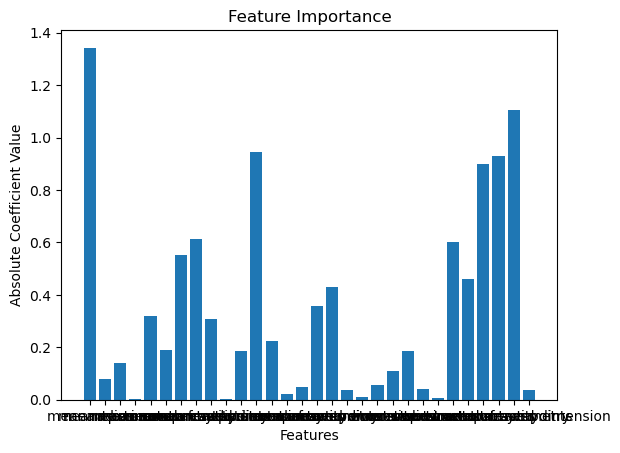

First Comparison


Accuracy before feature selection: 0.956140350877193


Accuracy after feature selection: 0.9649122807017544






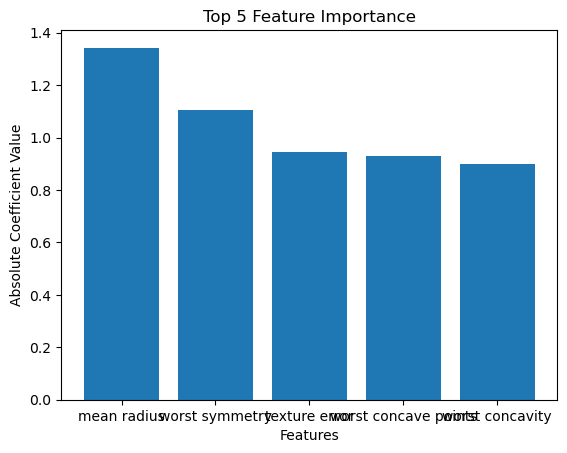



 The top 5 features are:
1.  mean radius    abs coefficient: 1.342570262007626
2.  worst symmetry    abs coefficient: 1.1052317347912606
3.  texture error    abs coefficient: 0.94338723724767
4,  worst concave points    abs coefficient: 0.9284028715978386
5,  worst concavity    abs coefficient: 0.8972021950196164


In [156]:
task4()

In [ ]:
if __name__ == "__main__":
    # Run the tasks
    print("Running Task 1: Basic SVM Implementation")
    task1()
    
    print("Running Task 2: Kernel Exploration")
    task2()
    
    print("Running Task 3: Hyperparameter Tuning")
    task3()
    
    print("Running Task 4: Feature Importance Analysis")
    task4()


# After completing the tasks, answer the following questions:
# 0. Explain the following SVM concepts in your own words:
    - Maximum margin and support vectors

    Answer: The maximum margin refers to the largest distance between a separating hyperplane and the closest data points of each class. Support vectors are the data points that establish this margin.

    The goal of SVM is to find the optimal hyperplane that best separates two classes by maximizing the margin. The margin is the distance between the hyperplane and the nearest dat points from each class.

    Ideally, you want the margin to be big. Similar to linear discriminant analysis, you want to MAXIMIZE separability to improve the classification model.
    
    - Kernel trick and why it's useful

    Answer: In SVM, classes are separated by a hyperplane defined by linear equations. Often, there is no linear equation that best separates classes from one another because the relationships between variables can be non-linear. To work around this issue, SVM algorithms can project the data onto higher-dimensional space using a variety of different mathematical transforms such as radial basis and polynomial transformations. In a higher-dimensional representation, linear relationships can be applied and a hyperplane can be established. 
    
# 1. Based on your implementation:
    - Which kernel performed best for the breast cancer dataset and why?

    Answer: The radial basis function had the highest accuracy during the evaluation of the three models 1) linear, 2) polynomial and 3) radial. This is because the data clearly exhibits a non-linear relationship. When transformed by the radial basis function, the data could be separated better using a linear hyperplane. The polynomial transformation also showed a better accuracy than linear svm, but rbf was the best.
    
    - How did changing the C parameter affect model performance?

    Answer:

    The parameter C is the pennalty number. This controls how the model is penalized for misclassifications. A higher C means the model is going to make a smaller margin and less misclassifications. A lower C means the model is going to have a larger margin and more misclassifications. 

    Earlier I said that SVM aims to maximize the margin. Although this is true, SVM also aims at finding an ideal misclassification/correct classification ratio. For something like breast cancer, perhaps a higher C, relatively smaller margin and least amount of misclassifications is necessary. This is domain and task specific.
    
    - What were the most important features in predicting breast cancer according to your model?

    Answer: 

    The top 5 features according to my model were:
1.  mean radius    abs coefficient: 1.342570262007626
2.  worst symmetry    abs coefficient: 1.1052317347912606
3.  texture error    abs coefficient: 0.94338723724767
4.  worst concave points    abs coefficient: 0.9284028715978386
5.  worst concavity    abs coefficient: 0.8972021950196164

# 2. Real-world applications:
    - Describe two real-world problems where SVM would be a good choice and why.

    Answer: 
    
    1). Bioinformatics (Protein Classification based on biophysical markers)

    These datasets can be high dimensional and relatively limited in entries (rows). SVM is a great classifier in the field of proteomics for this reason. There are also a lot of non-linear relationships between groups that other algorithms struggle to describe.

    2). Face Recognition tasks (for iphone, android, etc.)

    I know that SVM is used in face recognition technology because it is equipped at handling high-dimensional data like images. It is also resilient against overfitting and good at finding optimal decision boundaries vital for image recognition.
    
    - For one of these problems, explain how you would preprocess the data, select features, and evaluate model performance.

    For the proteomic classification, I would first scale/normalize all of the features and remove missing values. I would also encode all categorical variables, although there are rarely categorical biophysical features. 

    I would first use linear svm and evaluate the performance using accuracy metrics (accuracy, precision, recall, F1-scores, AUC_ROC curves)

    I would then compare the linear methods with a variety of kernel tricks (polynomial and radial basis function). 

    I would find the ideal approach and then use feature selection to optimize the model. Personally, I would train an SVM (using the preferred kernel trick) and then iteratively remove features based on their importance. I would repeat this process until the desired evaluation metrics have been reached. 
    

# 3. Limitations:
    - Discuss the limitations of SVM for large datasets.
    Answer: 
    
    SVM face limitations with regards to their computational complexity and scaling impediments. SVM project data into higher-dimensional space via kernel tricks and use a baseline quadratic programming optimization to find the best hyperplane for a given dataset. This can be extremely computationally expensive with large datasets. 

    Training time of SVM grows and often there is not enough memory/computing power required to run the model efficiently.

    SVM also requires a great deal of hyperparameter tuning. The penalty factor "C" requires a great deal of optimization, this is cross validated with the kernel type. The combination of hyperparameters that need to be tuned, make SVM computationally costly and time intensive when dealing with large datasets. 
    
    - Suggest alternative models that might perform better in such scenarios.

    Answer: 

    There are a variety of different methods that may potentially perform better than SVM when dealing with large datasets. They also might be computationally more affordable. 

    -Random Forests
    -Convolutional Neural Nets
    -XGBoosting

    Random forests are known to be able to handle large datasets and produce robust metrics

    Convolutional Neural Networks are great at handling image data and can leverage GPUs for faster processing.

    XGBoost is often used for large datasets 
    
